<a href="https://colab.research.google.com/github/ccrawford1983/MalariaDetectionModel/blob/main/CurtCrawford_Deep_Learning_Final_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Final Models
####<b>Summary
#####This Workbook contains the code for the Final Models (Model 1 and Model 3). We are happy to provide any and all code and results from testing waves 1-3 as well as the pre-trained model testing upon request.
####<b>Recommendation:
#####Our recommended solution depends on the circumstances:
#####-In areas where computing resources are plentiful, employ Model 1. 
#####-However, when computing resources are limited, consider utilizing Model 3 (with Gaussian Blurring pre-processing) to lessen the computational load while maintaining strong performance.


####<b>CNN Models
#####Model 1: 4 Convolutional Layers, filters = 128 (All Layers), Conv Layer Dropout(0.2), kernel_size = 2, Output Layer Dropout(0.6)
#####Model 3: 5 Convolutional Layers, filters = 64/64/64/64/32, kernel_size = 2, Conv Layer Dropout(0.3), Output Layer Dropout(0.4), Data Augmentation = Gaussian Blurring (Preprocessing)

####<b>Constants: 
#####Kernel size = 2 for all convolutional layers
#####Max Pooling for all convolutional layers
#####ReLU Activation for all Convolutional Layers
#####1 Fully Connected Layer (512 Neurons) w ReLU Activation
#####Output Layer (2 Neurons) w Softmax Activation

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###<b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras import optimizers

# Install albumentations for image augmentation
# !pip install albumentations
import albumentations

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

Folder_Structure.PNG

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Image Preprocessing
####<b>Create Gaussian Blurring versions of images

In [ ]:
import cv2
gb_train_images=[] # to hold Gaussian Blurring-converted images
gb_test_images=[] # to hold Gaussian Blurring-converted images

In [ ]:
for i in np.arange(0, len(train_images), 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)
  
  gb_train_images.append(b)

gb_train_images = np.array(gb_train_images)

In [ ]:
for i in np.arange(0, len(test_images), 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)
  
  gb_test_images.append(b)

gb_test_images = np.array(gb_test_images)

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function

train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

gb_train_images = (gb_train_images/255).astype('float32')
gb_test_images = (gb_test_images/255).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [ ]:
from tensorflow.keras.utils import to_categorical

# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.models import Sequential, clone_model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model 1 - 4 Convolutional Layers, filters = 128 (All Layers), kernel_size = 2, Conv Layer Dropout(0.2), Output Layer Dropout(0.6)**

###<b> Building the model

In [ ]:
model1_description = 'Model 1 - 4 Convolutional Layers, filters = 128 (All Layers), kernel_size = 2, Conv Layer Dropout(0.2), Output Layer Dropout(0.6)'

In [ ]:
# Creating sequential model
model1 = Sequential()

# First Convolutional Block
model1.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Second Convolutional Block
model1.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Third Convolutional Block
model1.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Fourth Convolutional Block
model1.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Fully Connected Layers
model1.add(Flatten())
model1.add(Dense(512, activation = "relu"))
model1.add(Dropout(0.6))

# Classifer
model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       65664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 128)       0

###<b>Cloning Model 1

In [ ]:
model1hsv_description = 'Model 1 w HSV Images'

In [ ]:
#for hsv testing
model1hsv = clone_model(model1)

In [ ]:
model1gb_description = 'Model 1 w Gaussian Blurring Images'

In [ ]:
#for Gaussian Blurring testing
model1gb = clone_model(model1)

In [ ]:
model1mb_description = 'Model 1 w Median Blurring Images'

In [ ]:
#for Median Blurring testing
model1mb = clone_model(model1)

In [ ]:
model1idg_description = 'Model 1 w Data Augmentation (Random horizontal and vertical Flipping and Rotation'

In [ ]:
#for ImageDataGenerator testing
model1idg = clone_model(model1)

###<b> Compiling the models

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#####<b> Fit and train our Model

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 14s 18ms/step - loss: 0.3455 - accuracy: 0.8312 - val_loss: 0.1132 - val_accuracy: 0.9864
Epoch 2/20
624/624 [==============================] - 11s 17ms/step - loss: 0.0921 - accuracy: 0.9704 - val_loss: 0.0726 - val_accuracy: 0.9840
Epoch 3/20
624/624 [==============================] - 11s 17ms/step - loss: 0.0780 - accuracy: 0.9759 - val_loss: 0.0467 - val_accuracy: 0.9896
Epoch 4/20
624/624 [==============================] - 11s 17ms/step - loss: 0.0748 - accuracy: 0.9773 - val_loss: 0.0574 - val_accuracy: 0.9866
Epoch 5/20
624/624 [==============================] - 11s 17ms/step - loss: 0.0708 - accuracy: 0.9774 - val_loss: 0.0484 - val_accuracy: 0.9862


###<b> Model 3 - 5 Convolutional Layers, filters = 64/64/64/64/32, kernel_size = 2, Conv Layer Dropout(0.3), Output Layer Dropout(0.4)

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
model3_description = 'Model 3 - 5 Convolutional Layers, filters = 64/64/64/64/32, kernel_size = 2, Conv Layer Dropout(0.3), Output Layer Dropout(0.4)'

In [ ]:
# Creating sequential model
model3 = Sequential()

# First Convolutional Block
model3.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.3))

# Second Convolutional Block
model3.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.3))

# Third Convolutional Block
model3.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.3))

# Fourth Convolutional Block
model3.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.3))

# Fifth Convolutional Block
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.3))

# Fully Connected Layers
model3.add(Flatten())
model3.add(Dense(512, activation = "relu"))
model3.add(Dropout(0.4))

# Classifer
model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

###<b>Cloning Model 3

In [ ]:
model3gb_description = 'Model 3 w Gaussian Blurring Images'

In [ ]:
#for Gaussian Blurring testing
model3gb = clone_model(model3)

###<b> Compiling the models

In [ ]:
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model3gb.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#####<b> Fit and train our Model

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history3 = model3.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 8s 11ms/step - loss: 0.3255 - accuracy: 0.8451 - val_loss: 0.0905 - val_accuracy: 0.9846
Epoch 2/20
624/624 [==============================] - 6s 10ms/step - loss: 0.1004 - accuracy: 0.9690 - val_loss: 0.0548 - val_accuracy: 0.9852
Epoch 3/20
624/624 [==============================] - 7s 11ms/step - loss: 0.0822 - accuracy: 0.9744 - val_loss: 0.0546 - val_accuracy: 0.9854
Epoch 4/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0826 - accuracy: 0.9741 - val_loss: 0.0397 - val_accuracy: 0.9860
Epoch 5/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0731 - accuracy: 0.9768 - val_loss: 0.0429 - val_accuracy: 0.9860
Epoch 6/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0739 - accuracy: 0.9769 - val_loss: 0.0611 - val_accuracy: 0.9806


#####<b> Fit and train our Model

In [ ]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history3gb = model3gb.fit(gb_train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 10ms/step - loss: 0.3245 - accuracy: 0.8485 - val_loss: 0.0984 - val_accuracy: 0.9856
Epoch 2/20
624/624 [==============================] - 6s 10ms/step - loss: 0.1058 - accuracy: 0.9645 - val_loss: 0.0534 - val_accuracy: 0.9884
Epoch 3/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0872 - accuracy: 0.9712 - val_loss: 0.0623 - val_accuracy: 0.9802
Epoch 4/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0836 - accuracy: 0.9727 - val_loss: 0.0354 - val_accuracy: 0.9876
Epoch 5/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0824 - accuracy: 0.9732 - val_loss: 0.0450 - val_accuracy: 0.9850
Epoch 6/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0793 - accuracy: 0.9743 - val_loss: 0.0351 - val_accuracy: 0.9874
Epoch 7/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0787 - accuracy: 0.9747 - val_loss: 0.0761 - val_accuracy: 0.9748

###<b> Model Performance Comparison: 

####<b>Defining Functions and Creating Lists

In [ ]:
histories = [history1, history3gb]

In [ ]:
models = [model1, model3gb]

In [ ]:
model_shorthand = ['model1', 'model3gb']

In [ ]:
model_descriptions = [model1_description, model3gb_description]

In [ ]:
#Using the appropriately sized test images for each model
test_image_list = [test_images, gb_test_images]

In [ ]:
# Creating a function to output Test Accuracy by Model
def model_evaluation(model_name, test_image_set):
    accuracy = model_name.evaluate(test_image_set, test_labels, verbose = 1)
    print('\n', 'Test_Accuracy:-', accuracy[1])

In [ ]:
# Creating a function to output Test Accuracy by Model for Comparison Spreadsheet
def model_accuracy(model_description, model_name, test_image_set):
    accuracy = model_name.evaluate(test_image_set, test_labels, verbose = 0)
    print(model_description + ' | ' + str(accuracy[1]))

In [ ]:
# Creating a function to output Test Accuracy (Only) by Model for Comparison Spreadsheet
def accuracy_only(model_name, test_image_set):
    accuracy = model_name.evaluate(test_image_set, test_labels, verbose = 0)
    print(accuracy[1])

In [ ]:
# Creating a function to output Classification Report and Confusion Matrix by Model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
def ClassReport_ConfMatrix(model_name, test_image_set):
  pred = model_name.predict(test_image_set)

  pred = np.argmax(pred, axis = 1) 

  y_true = np.argmax(test_labels, axis = 1)

  # Printing the classification report
  print(classification_report(y_true, pred))

  # Plotting the heatmap using confusion matrix

  cm = confusion_matrix(y_true, pred)

  plt.figure(figsize = (8, 5))

  sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

  plt.ylabel('Actual')

  plt.xlabel('Predicted')

  plt.show()

In [ ]:
def perf_measure(model_name, images):
  TP = 0
  FP = 0
  TN = 0
  FN = 0
  pred = model_name.predict(images)
  pred = np.argmax(pred, axis = 1) 
  y_true = np.argmax(test_labels, axis = 1)
  for i in range(len(pred)): 
    if y_true[i]==pred[i]==1:
      TP += 1
    if pred[i]==1 and y_true[i]!=pred[i]:
      FP += 1
    if y_true[i]==pred[i]==0:
      TN += 1
    if pred[i]==0 and y_true[i]!=pred[i]:
      FN += 1
  return(TP, FP, TN, FN)

In [ ]:
import time
def runtime(model_name, images):
  pred_time_list=[]
  for i in range(10):
      start = time.process_time() 
      result = model_name.predict(images)
      end = time.process_time()
      pred_time_list.append(end-start)
  time_per_1k_images = sum(pred_time_list)/len(images)*1000
  return(time_per_1k_images)

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history,description):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title(description)
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

####<b>Model Comparisons

In [ ]:
#Show Test Accuracy for All Models
for (m, d, i) in zip(models, model_descriptions, test_image_list):
  print(d)
  print()
  model_evaluation(m,i)
  print('\n'+'*'*80+'\n')

Model 1 - 4 Convolutional Layers, filters = 128 (All Layers), kernel_size = 2, Conv Layer Dropout(0.2), Output Layer Dropout(0.6)

82/82 [==============================] - 1s 8ms/step - loss: 0.0518 - accuracy: 0.9850

 Test_Accuracy:- 0.9850000143051147

********************************************************************************

Model 3 w Gaussian Blurring Images

82/82 [==============================] - 1s 5ms/step - loss: 0.0495 - accuracy: 0.9850

 Test_Accuracy:- 0.9850000143051147

********************************************************************************



Model 1 - 4 Convolutional Layers, filters = 128 (All Layers), kernel_size = 2, Conv Layer Dropout(0.2), Output Layer Dropout(0.6)

82/82 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.99      0.99      0.98      2600
weighted avg       0.99      0.98      0.98      2600



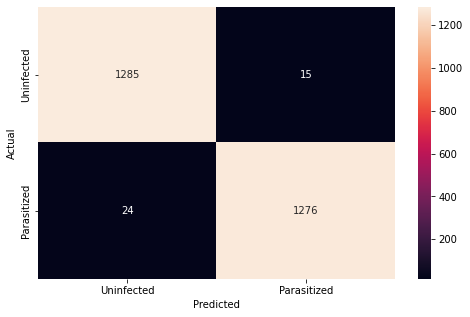


********************************************************************************

Model 3 w Gaussian Blurring Images

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.99      0.98      0.98      2600
weighted avg       0.99      0.98      0.98      2600



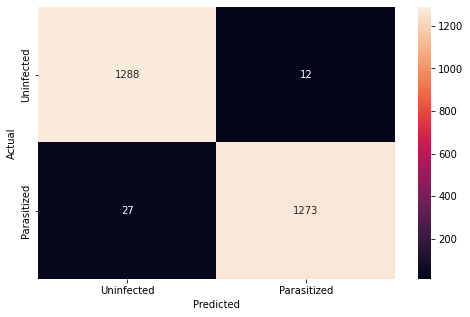


********************************************************************************



In [ ]:
#Show Classification Reports and Confusion Matrixes for All Models
for (m, d, i) in zip(models, model_descriptions, test_image_list):
  print(d)
  print()
  ClassReport_ConfMatrix(m, i)
  print('\n'+'*'*80+'\n')

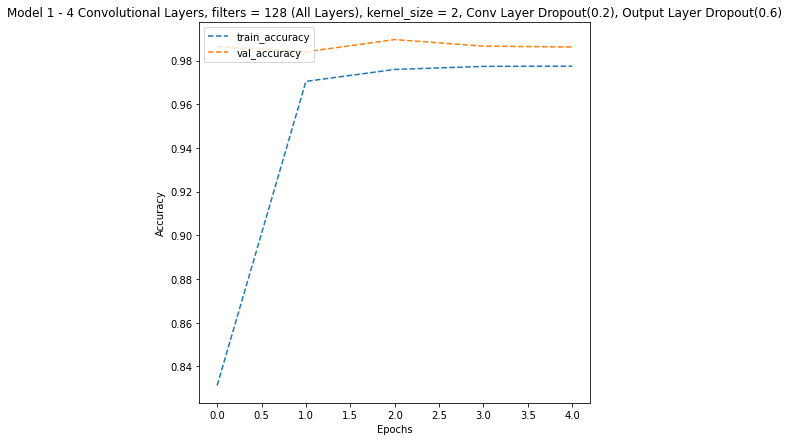

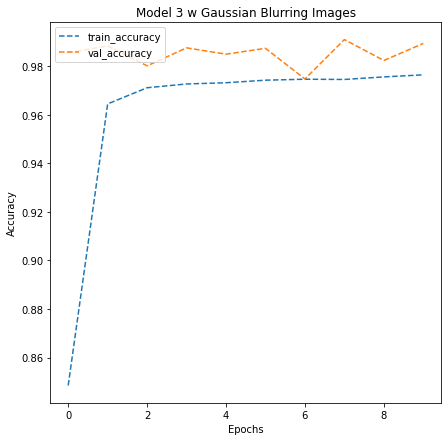

In [ ]:
#Show Accuracy by Epoch for All Models
for (h,d) in zip(histories,model_descriptions):
  plot_accuracy(h,d)

In [ ]:
#Show Accuracy by Description for All Models
for (d,m,i) in zip(model_shorthand, models, test_image_list):
  model_accuracy(d,m,i)

model1 | 0.9850000143051147
model3gb | 0.9850000143051147


####<b>For Spreadsheet Comparison

In [ ]:
model_descriptions

['Model 1 - 4 Convolutional Layers, filters = 128 (All Layers), kernel_size = 2, Conv Layer Dropout(0.2), Output Layer Dropout(0.6)',
 'Model 3 w Gaussian Blurring Images']

In [ ]:
# For Comparison Spreadsheet (TP, FP, TN, FN)
for (d, m, i) in zip(model_shorthand, models, test_image_list):
    print(d + ' | ' + str(perf_measure(m, i)))

82/82 [==============================] - 0s 5ms/step
model1 | (1276, 15, 1285, 24)
82/82 [==============================] - 0s 3ms/step
model3gb | (1273, 12, 1288, 27)


In [ ]:
for (m, i) in zip(models, test_image_list):
  accuracy_only(m, i)

0.9850000143051147
0.9850000143051147


In [ ]:
for (s, m, i) in zip(model_shorthand, models, test_image_list):
  print(s + ' | '+str(runtime(m, i)))

82/82 [==============================] - 0s 5ms/step
model1 | 2.49516147500001
82/82 [==============================] - 0s 3ms/step
model3gb | 1.8271788784615457
